In [3]:
def set_size(width=505.89, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

figsize = set_size()

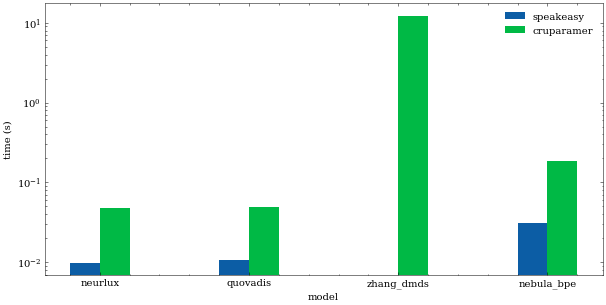

In [15]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

from collections import defaultdict

# read_filter_normalize == rfn
# tokenizer encode == te
# total == rfn + te

# =====================
# speakeasy
speakeasy_trainset_size = 76126

rfn = defaultdict(dict)
rfn['speakeasy']['neurlux'] = 527 / speakeasy_trainset_size
rfn['speakeasy']['quovadis'] = 355 / speakeasy_trainset_size
rfn['speakeasy']['zhang_dmds'] = 0 / speakeasy_trainset_size # TBD
rfn['speakeasy']['nebula_bpe'] = 1506 / speakeasy_trainset_size
#rfn['speakeasy']['nebula_whitespace'] = 1425 / speakeasy_trainset_size

te = defaultdict(dict)
te['speakeasy']['neurlux'] = 219 / speakeasy_trainset_size
te['speakeasy']['quovadis'] = 455 / speakeasy_trainset_size 
te['speakeasy']['zhang_dmds'] = 0 / speakeasy_trainset_size # TBD
te['speakeasy']['nebula_bpe'] = 867 / speakeasy_trainset_size
#te['speakeasy']['nebula_whitespace'] = 200 / speakeasy_trainset_size

total = defaultdict(dict)
total['speakeasy']['neurlux'] = rfn['speakeasy']['neurlux'] + te['speakeasy']['neurlux']
total['speakeasy']['quovadis'] = rfn['speakeasy']['quovadis'] + te['speakeasy']['quovadis']
total['speakeasy']['zhang_dmds'] = rfn['speakeasy']['zhang_dmds'] + te['speakeasy']['zhang_dmds']
total['speakeasy']['nebula_bpe'] = rfn['speakeasy']['nebula_bpe'] + te['speakeasy']['nebula_bpe']
#total['speakeasy']['nebula_whitespace'] = rfn['speakeasy']['nebula_whitespace'] + te['speakeasy']['nebula_whitespace']

# avast 
# avast_trainset_size = 37512
# rfn['avast']['nebula_bpe'] = 112/avast_trainset_size
# rfn['avast']['nebula_whitespace'] = (4+7)/avast_trainset_size
# rfn['avast']['neurlux'] = 17/avast_trainset_size

# =====================
# cruparamer 3rd party data
cruparamer_trainset_size = 30000
# start 13:05:41 end 13:29:33 took 23m 52s (1432s)
rfn['cruparamer']['nebula_bpe'] = 1432/cruparamer_trainset_size
rfn['cruparamer']['neurlux'] = 1432/cruparamer_trainset_size
rfn['cruparamer']['quovadis'] = 1432/cruparamer_trainset_size
rfn['cruparamer']['zhang_dmds'] = 1432/cruparamer_trainset_size

# start 13:29:33 end 14:37:39 took 1h 8m 6s (4086s)
te['cruparamer']['nebula_bpe'] = 4086/cruparamer_trainset_size
te['cruparamer']['neurlux'] = 9/cruparamer_trainset_size
te['cruparamer']['quovadis'] = (18+7)/cruparamer_trainset_size
# 2023-03-27 08:54:04,809 WARNING  [!] Working on dmds train preprocessing...
# ... 224/30000 [22:41<100:53:14, 12.20s/it] 
te['cruparamer']['zhang_dmds'] = 12.2

total['cruparamer']['nebula_bpe'] = rfn['cruparamer']['nebula_bpe'] + te['cruparamer']['nebula_bpe']
total['cruparamer']['neurlux'] = rfn['cruparamer']['neurlux'] + te['cruparamer']['neurlux']
total['cruparamer']['quovadis'] = rfn['cruparamer']['quovadis'] + te['cruparamer']['quovadis']
total['cruparamer']['zhang_dmds'] = rfn['cruparamer']['zhang_dmds'] + te['cruparamer']['zhang_dmds']

# plot grouped barplot (only total) -- x axis: model, y axis: time, group on same label: dataset (speakeasy, cruparamer)
fig, ax = plt.subplots(1,1, figsize=(10, 5))
width = 0.2
x_ticks = ['neurlux', 'quovadis', 'zhang_dmds', 'nebula_bpe']#, 'nebula_whitespace']
x = [i for i in range(len(x_ticks))]
ax.bar([i-width/2 for i in x], [total['speakeasy'][i] for i in x_ticks], width=width, label='speakeasy')
ax.bar([i+width/2 for i in x], [total['cruparamer'][i] for i in x_ticks], width=width, label='cruparamer')
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)
ax.set_ylabel('time (s)')
ax.set_xlabel('model')
ax.legend()
ax.set_yscale('log')
plt.show()


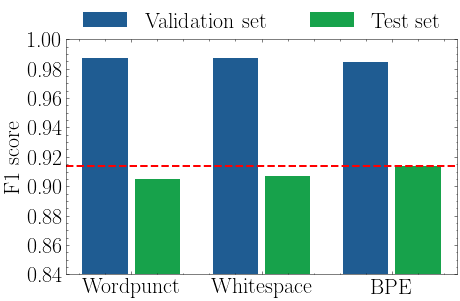

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots
from collections import defaultdict
fontsize=22
plt.style.use(["science"])#, "no-latex"])
# use default style
#plt.style.use("default")


# validation set
# Wordpunct 0.9872
# Whitespace 0.9870
# BPE 0.9847

# test set
# Wordpunct 0.9049
# Whitespace 0.9068
# BPE 0.9136

# create data for the barplot based on values above
tokenizer_data = defaultdict(dict)
tokenizer_data['Tokenizer'] = ['Wordpunct', 'Whitespace', 'BPE']
tokenizer_data['Validation set'] = [0.9872, 0.9870, 0.9847]
tokenizer_data['Test set'] = [0.9049, 0.9068, 0.9136]

#Set up the matplotlib figure
fig, ax = plt.subplots(1, 1, figsize=set_size())

# Create the barplot using seaborn where the x-axis are Tokenizer
# the y-axis are the values, hue - validation/test set
sns.barplot(x='Tokenizer', y='value', hue='variable', data=pd.melt(pd.DataFrame(tokenizer_data), ['Tokenizer']), ax=ax)#, dodge=False)
# plot red dashed line at 0.9136
ax.axhline(y=0.9136, color='r', linestyle='--', linewidth=2)

# put the legend outside the plot above in the middle
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, 0.35)

ax.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=2, fontsize=fontsize)
# remove xlabel
ax.set_xlabel('')
ax.set_ylim(0.85, 1.0)
_ = ax.set_ylabel("F1 score", fontsize=fontsize)

# increase fontsize of yticks
label_format = '{:,.2f}'
ticks_loc = ax.get_yticks().tolist()
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels([label_format.format(x) for x in ticks_loc], fontsize=fontsize)

xticklabels = ax.get_xticklabels()
_ = ax.set_xticklabels([x for x in xticklabels], fontsize=fontsize)

# savefig as pdf with ttight
import os
REPO_ROOT = os.path.join(os.path.dirname(os.path.basename(".")), '..', '..')
pdfname = os.path.join(REPO_ROOT, 'img', 'tokenizer_comaprison.pdf')
plt.savefig(pdfname, bbox_inches='tight')